**Description**

Using NLP and ML for identifying abusive speech for Twitter users in Indonesia

**Problem Statement:**

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium to spread hate.

by using NLP techniques, perform specific cleanup for tweets data, and make a robust model.

**Analysis to be done:**

Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data already be done by using SWAGGER UI,
However, visualization and prediction still be needed by using Machine Learning and trying to get the best model.

**About the dataset**


dataset for multi-label hate speech and abusive language detection in the Indonesian Twitter.

The main dataset can be seen at **re_dataset** with labels information as follows:
* **HS** : hate speech label;
* **Abusive** : abusive language label;
* **HS_Individual** : hate speech targeted to an individual;
* **HS_Group** : hate speech targeted to a group;
* **HS_Religion** : hate speech related to religion/creed;
* **HS_Race** : hate speech related to race/ethnicity;
* **HS_Physical** : hate speech related to physical/disability;
* **HS_Gender** : hate speech related to gender/sexual orientation;
* **HS_Gender** : hate related to other invective/slander;
* **HS_Weak** : weak hate speech;
* **HS_Moderate** : moderate hate speech;
* **HS_Strong** : strong hate speech.

For each label, `1` means `yes` (tweets including that label), `0` mean `no` (tweets are not included in that label).

## Import Libraries and Load Data

In [236]:
# Library for data processing and visualization
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Libary for Machine Learning Process
from sklearn.model_selection import train_test_split
import itertools
from keras.utils import to_categorical
from keras import backend as K
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils.np_utils import to_categorical
from joblib import dump, load

In [74]:
df = pd.read_csv('cleaned_data.csv', encoding='latin-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau eluedan gue berg...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu akunnku tau matamu tapi dilihat dari ...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum sudah kelihatan dongoknya dari awal tam...,1,1,0,1,1,0,0,0,0,0,1,0


In [75]:
#view one of the tweets randomly
random = np.random.randint(0,len(df))
print(random)
df.iloc[random]['Tweet']

3232


' mulu  wkwk'

## Exploratory Data Analysis

In [76]:
#Number of rows and columns
df.shape

(13169, 13)

In [77]:
# Check duplicates data
df.duplicated().sum()

323

In [78]:
# Delete duplicates data
df = df.drop_duplicates()

In [79]:
df.duplicated().sum()

0

In [80]:
# Check Missing Value
df.isna()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [81]:
# Missing value percentage of every column
df.isna().sum()/df.shape[0]

Tweet            0.000311
HS               0.000000
Abusive          0.000000
HS_Individual    0.000000
HS_Group         0.000000
HS_Religion      0.000000
HS_Race          0.000000
HS_Physical      0.000000
HS_Gender        0.000000
HS_Other         0.000000
HS_Weak          0.000000
HS_Moderate      0.000000
HS_Strong        0.000000
dtype: float64

## Data Pre-Processing

In [82]:
# Make a new column to input the clean data(Length of Characters for every row)
df['total_char'] = df['Tweet'].str.len()

In [83]:
# Length of text for every row
df['total_word'] = df.Tweet.apply(lambda sent: len(str(sent).split()) if isinstance(sent, str) else 0)

In [84]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,129.0,21
1,siapa yang telat memberi tau eluedan gue berg...,0,1,0,0,0,0,0,0,0,0,0,0,100.0,17
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,250.0,38
3,aku itu akunnku tau matamu tapi dilihat dari ...,0,0,0,0,0,0,0,0,0,0,0,0,58.0,11
4,kaum sudah kelihatan dongoknya dari awal tam...,1,1,0,1,1,0,0,0,0,0,1,0,60.0,9


In [85]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12846 entries, 0 to 13168
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tweet          12842 non-null  object 
 1   HS             12846 non-null  int64  
 2   Abusive        12846 non-null  int64  
 3   HS_Individual  12846 non-null  int64  
 4   HS_Group       12846 non-null  int64  
 5   HS_Religion    12846 non-null  int64  
 6   HS_Race        12846 non-null  int64  
 7   HS_Physical    12846 non-null  int64  
 8   HS_Gender      12846 non-null  int64  
 9   HS_Other       12846 non-null  int64  
 10  HS_Weak        12846 non-null  int64  
 11  HS_Moderate    12846 non-null  int64  
 12  HS_Strong      12846 non-null  int64  
 13  total_char     12842 non-null  float64
 14  total_word     12846 non-null  int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 1.6+ MB


In [86]:
#Data information for ['total_char']
mean = df['total_char'].mean()
median = df['total_char'].median()
mode = df['total_char'].mode().values[0]
range_total_char = df.total_char.max() - df.total_char.min()

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Range:", range_total_char)

Mean: 109.3945647095468
Median: 95.0
Mode: 46.0
Range: 474.0


In [87]:
#Data information for ['total_word']
mean = df['total_word'].mean()
median = df['total_word'].median()
mode = df['total_word'].mode().values[0]
range_total_word = df.total_word.max() - df.total_word.min()

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Range:", range_total_word)

Mean: 16.226996730499767
Median: 14.0
Mode: 9
Range: 65


## Check Outlier Data

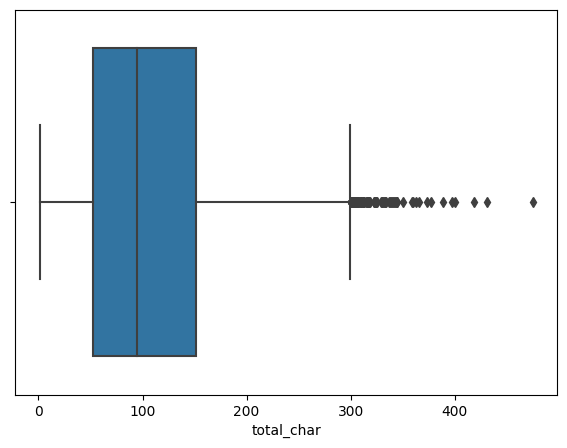

In [88]:
#Outlier Data for ['total_char']

plt.figure()
sns.boxplot(x = df['total_char'])
plt.show()

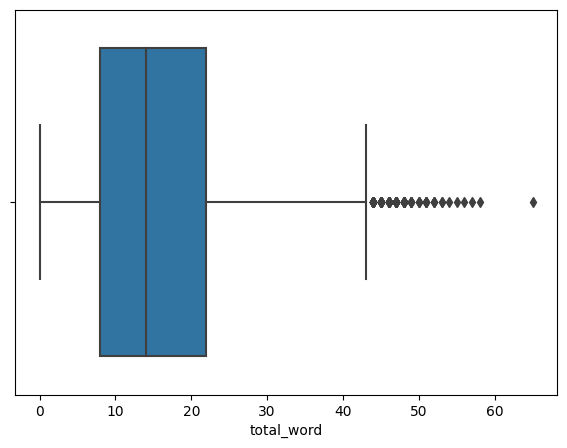

In [89]:
#Outlier Data for ['total_word']

plt.figure()
sns.boxplot(x = df['total_word'])
plt.show()

##EDA

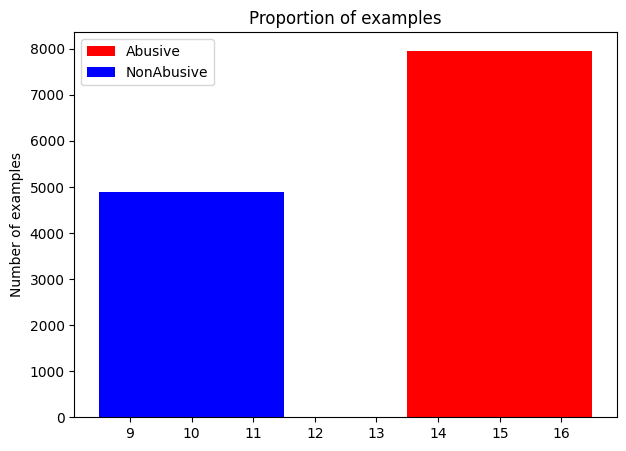

In [90]:
# extracting the number of examples of each class
NonAbusive_len = df[df['Abusive'] == 0].shape[0]
Abusive_len = df[df['Abusive'] == 1].shape[0]

# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(15,NonAbusive_len,3, label="Abusive", color='red')
plt.bar(10,Abusive_len,3, label="NonAbusive", color='blue')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

The graph shows that still a lot people tweets about abusive context than not abusive

<Axes: xlabel='total_word', ylabel='total_char'>

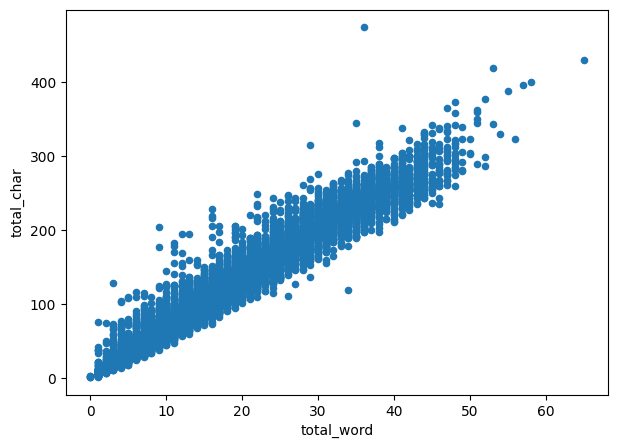

In [91]:
# Check the correlation of total word and total characters

df.plot(x='total_word',y='total_char', kind = 'scatter')

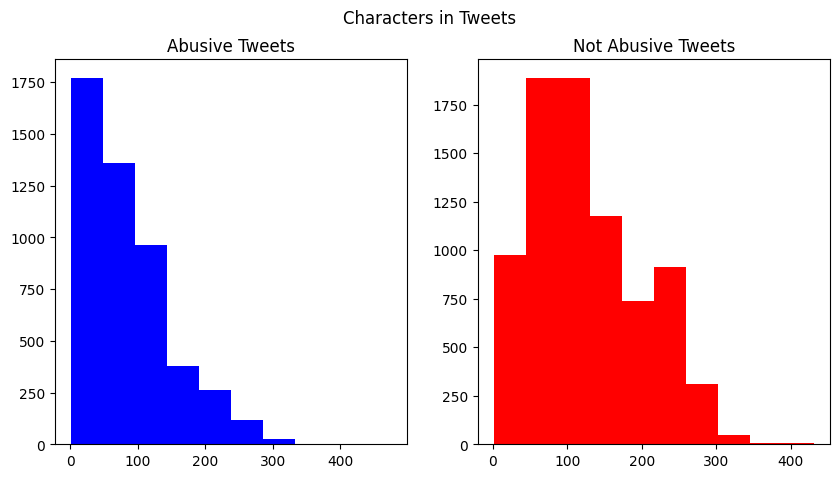

In [92]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['Abusive']==1]['total_char']
ax1.hist(tweet_len,color='blue')
ax1.set_title('Abusive Tweets')
tweet_len=df[df['Abusive']==0]['total_char']
ax2.hist(tweet_len,color='red')
ax2.set_title('Not Abusive Tweets')
fig.suptitle('Characters in Tweets')
plt.show()

The graph shows about the number of characters of abusive tweets and not abusive tweets

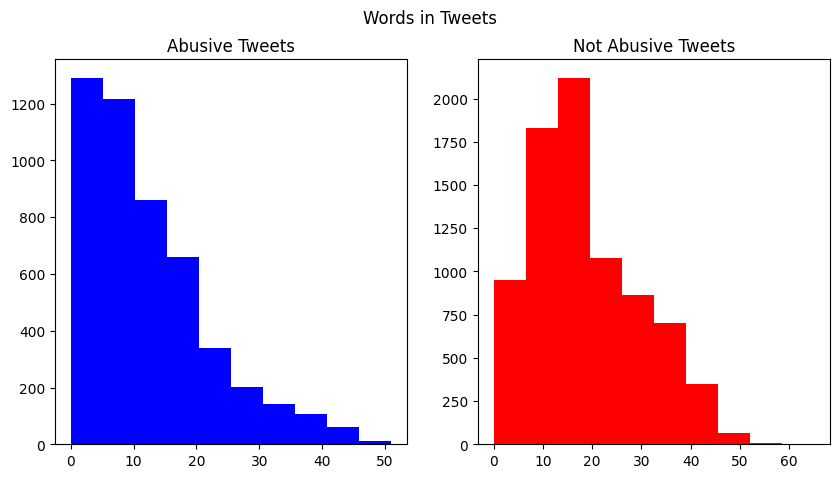

In [93]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['Abusive']==1]['total_word']
ax1.hist(tweet_len,color='blue')
ax1.set_title('Abusive Tweets')
tweet_len=df[df['Abusive']==0]['total_word']
ax2.hist(tweet_len,color='red')
ax2.set_title('Not Abusive Tweets')
fig.suptitle('Words in Tweets')
plt.show()

The graph shows about the number of words of abusive tweets and not abusive tweets

Text(0.5, 0.98, 'Average word length in each tweet')

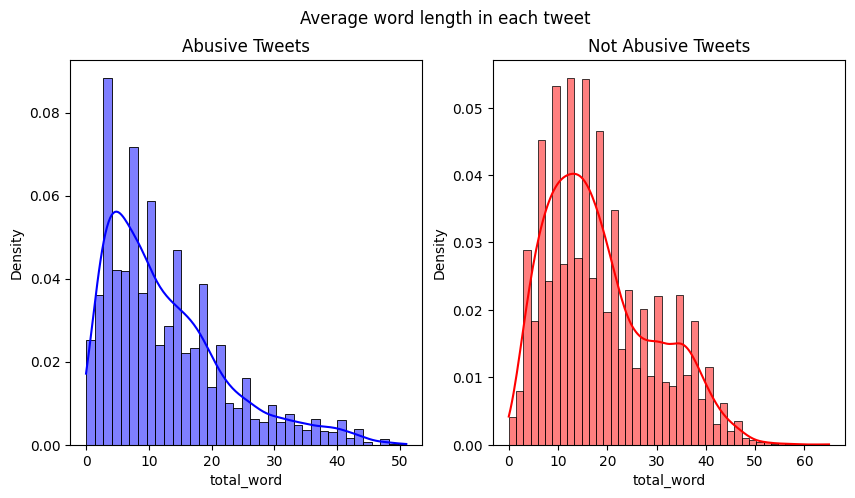

In [94]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['Abusive']==1]['total_word']
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue',kde=True, stat="density")
ax1.set_title('Abusive Tweets')
word=df[df['Abusive']==0]['total_word']
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red',kde=True, stat="density")
ax2.set_title('Not Abusive Tweets')
fig.suptitle('Average word length in each tweet')

the graph shows represents a density curve the distribution values of average word length in each tweet for abusive and not abusive tweets

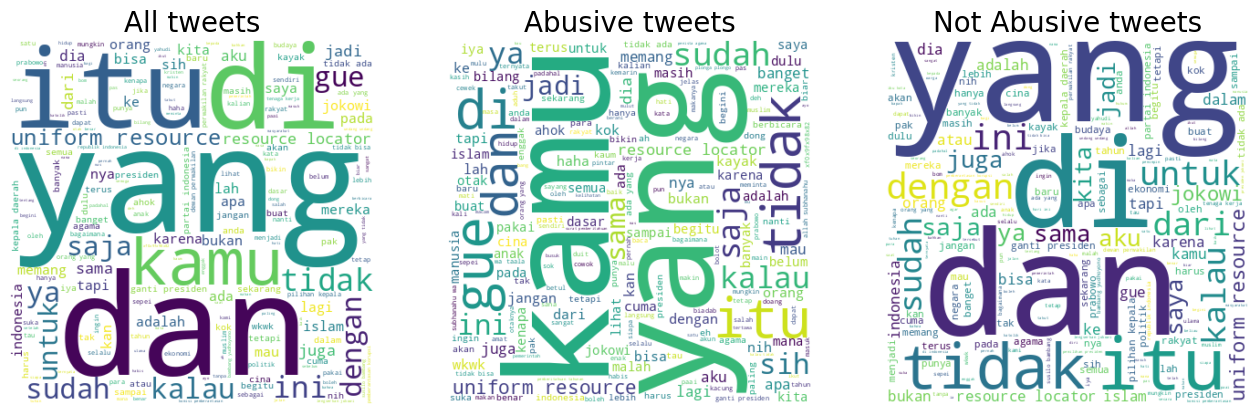

In [113]:
# Generating the wordcloud with the values under the category dataframe for all, abusive and not abusive tweets
from wordcloud import WordCloud

# Convert 'Tweet' column to strings
df['Tweet'] = df['Tweet'].astype(str)

all_words = ' '.join(df['Tweet'].values)
Abusive_words = ' '.join(df[df['Abusive'] == 1]['Tweet'].values)
NotAbusive_words = ' '.join(df[df['Abusive'] == 0]['Tweet'].values)

plt.figure(figsize=(16, 8))

cloud1 = WordCloud(width=400, height=400, background_color='white').generate(all_words)
plt.subplot(131)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('All tweets', size=20)

cloud2 = WordCloud(width=400, height=400, background_color='white').generate(Abusive_words)
plt.subplot(132)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Abusive tweets', size=20)

cloud3 = WordCloud(width=400, height=400, background_color='white').generate(NotAbusive_words)
plt.subplot(133)
plt.imshow(cloud3, interpolation="bilinear")
plt.axis("off")
plt.title('Not Abusive tweets', size=20)
plt.show()

Frequent words
the graph shows what words are the most frequenst in abusive and not abusive tweets and in total.

## Machine Learning Model Processing

In [218]:
# Using Bag of Words approach for final data Preparation.

cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['Tweet']).toarray()
y = df['Abusive']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Using Random Forest Classifier as the Model

accuracy is:  0.7085603112840467


['rf.joblib']

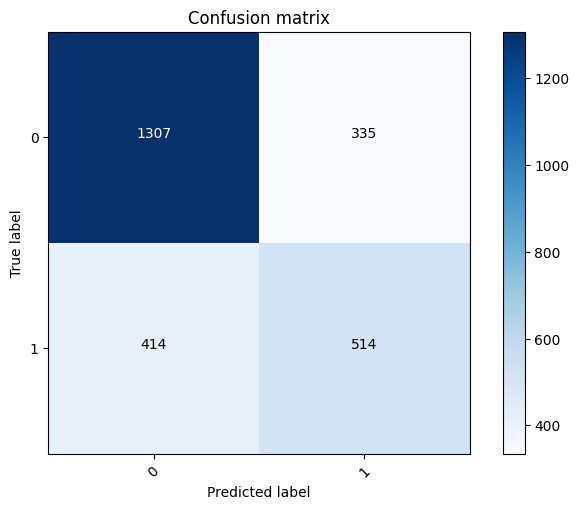

In [223]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(2))
dump(clf, 'rf.joblib')

#Using Decision tree as the Model

accuracy is:  0.6626459143968871


['decision.joblib']

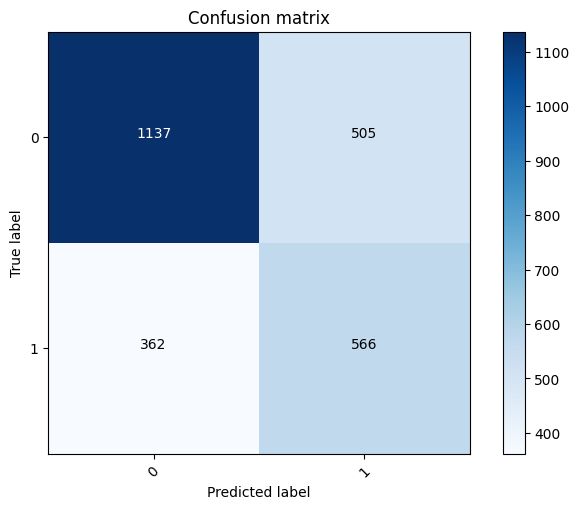

In [225]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(2))
dump(clf, 'decision.joblib')

In [226]:
# Converting the labels into categorical format
y_train=to_categorical(y_train, num_classes = 2, dtype='float32')
y_test=to_categorical(y_test, num_classes = 2, dtype='float32')

#Creating and Training an LSTM Model

In [232]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test),
                    epochs=epochs, batch_size=batch_size)

Epoch 1/25
161/161 [==============================] - 148s 893ms/step - loss: 0.6664 - accuracy: 0.6149 - val_loss: 0.6496 - val_accuracy: 0.6389
Epoch 2/25
161/161 [==============================] - 145s 902ms/step - loss: 0.6601 - accuracy: 0.6148 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 3/25
161/161 [==============================] - 154s 956ms/step - loss: 0.6597 - accuracy: 0.6148 - val_loss: 0.6558 - val_accuracy: 0.6389
Epoch 4/25
161/161 [==============================] - 130s 805ms/step - loss: 0.6580 - accuracy: 0.6140 - val_loss: 0.6443 - val_accuracy: 0.6377
Epoch 5/25
161/161 [==============================] - 136s 843ms/step - loss: 0.6532 - accuracy: 0.6148 - val_loss: 0.6323 - val_accuracy: 0.6518
Epoch 6/25
161/161 [==============================] - 130s 806ms/step - loss: 0.6520 - accuracy: 0.6176 - val_loss: 0.6446 - val_accuracy: 0.6358
Epoch 7/25
161/161 [==============================] - 135s 838ms/step - loss: 0.6471 - accuracy: 0.6192 - val_loss: 0.6318 -

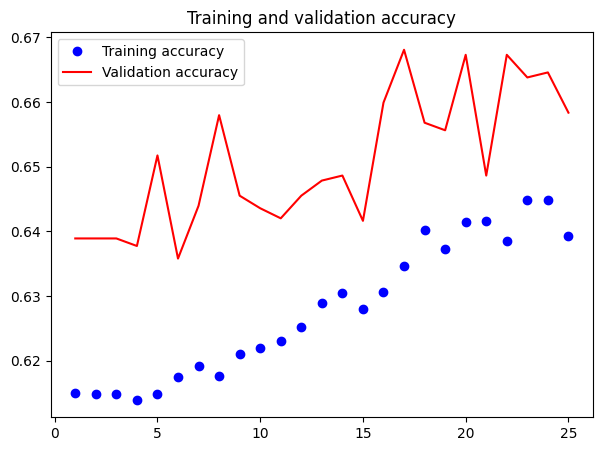

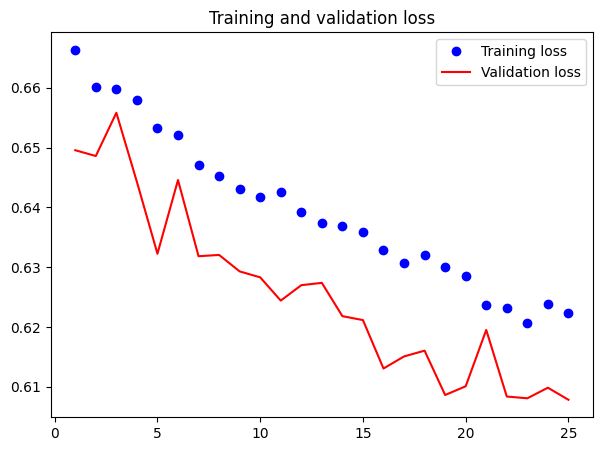

In [233]:
# Visualization of LSTM Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [234]:
# Saving LSTM Model
model.save('lstm.h5')